# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
from HouseholdSpecializationModel import NewModelQ5

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Question 1

**Explain how you solve the model**

In [2]:
# Import Class
model1 = HouseholdSpecializationModelClass()

# To find the changes in HF/HM when alpha=[0.25 , 0.5 , 0.75] is found by making a for loop:

HF_HM_alpha = [] #defineing an empty list, for the values of HF/HM when alpha changes
alphas = [0.25, 0.50, 0.75] #the alpha values
sigma = 0.5
for alpha in alphas: #for loop
    model1.par.alpha = alpha #importing the alpha from the Class
    opt = model1.solve_discrete() #importing the discrete function
    HF_HM_alpha.append(opt.HF/opt.HM) #defining function HF/HM
HF_HM_alpha

/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:76: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q, 1e-08)**(1-par.rho)/(1-par.rho)


[0.3076923076923077, 1.0, 3.25]

In [3]:
model1 = HouseholdSpecializationModelClass()
#We do the same for sigma
HF_HM_sigma = []
sigmas = [0.5, 1.0, 1.5]
alpha = 0.5

for sigma in sigmas:
    model1.par.sigma = sigma
    opt = model1.solve_discrete()
    HF_HM_sigma.append(opt.HF/opt.HM)
HF_HM_sigma

/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in reciprocal
  inner = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))
/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:72: RuntimeWarning: invalid value encountered in reciprocal
  H = np.fmax(inner, 1e-07)**(par.sigma/(par.sigma-1))


[1.0, 1.0, 1.0]

When $\sigma$ is fixed at 0.5, $\alpha$ changes the values for $\frac{HF}{HM}$ becomes:
- $\alpha$ = 0.25 -> $\frac{HF}{HM}$ = 0.31
- $\alpha$  = 0.50 -> $\frac{HF}{HM}$ = 1.0
- $\alpha$  = 0.75 -> $\frac{HF}{HM}$ = 4.67
When $\sigma$ is fixed af $\sigma=0.5$, an increse in $\alpha$ results in the female becoming more productive at home compared to the male.  

When $\alpha$ is fixed at 0.5, $\sigma$ changes the values for HF/HM becomes:
- $\sigma$ = 0.5 -> $\frac{HF}{HM}$ = 1.0
- $\sigma$ = 1.0 -> $\frac{HF}{HM}$ = 1.0
- $\sigma$ = 1.5 -> $\frac{HF}{HM}$ = 1.0

A fixed $\alpha$ at 0.5, which means men and women are equally productive, a change in $\sigma$ doesn't affect the ratio. 

To get a more indept analysis we next look at, the model where both $\sigma$ and $\alpha$ varies



In [4]:
# First a list for both alpha and sigma values are created
alpha_l = [0.25, 0.5, 0.75]
sigma_l = [0.5,1.0,1.5]

# Second a tabel is constructed for the valkues
df = pd.DataFrame(columns = pd.Index(alpha_l, name="sigma/alpha"), index = pd.Index(sigma_l, name=""))

# Third the model is sobled for the diffent parameter values
for i in alpha_l:
    for j in sigma_l:
        model1.par.alpha = i
        model1.par.sigma = j
        results = model1.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Lastly the tabel is printed
print(df)

sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


Here we can see, that when $\alpha>0.50$ the women are more productive at home then men, since  $\sigma>1$. For $\alpha<0.50$, men are more productive at home. 
On the other hand, if women outperform men in home production, an increase in $\sigma$ will lead to a decrease in the ratio, whereas a higher $\sigma$  will result in an increase in the ratio when men are more productive in home production than women. Essentially, a higher elasticity of substitution implies that even a slight change in women's productivity compared to men will have a more pronounced impact on the optimal ratio. Consequently, a marginal decrease in $\alpha$ will cause a significant drop in the ratio, while a marginal increase in $\alpha$ will lead to a substantial increase in the ratio.

# Question 2

Explain your code and procedure

/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:76: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q, 1e-08)**(1-par.rho)/(1-par.rho)


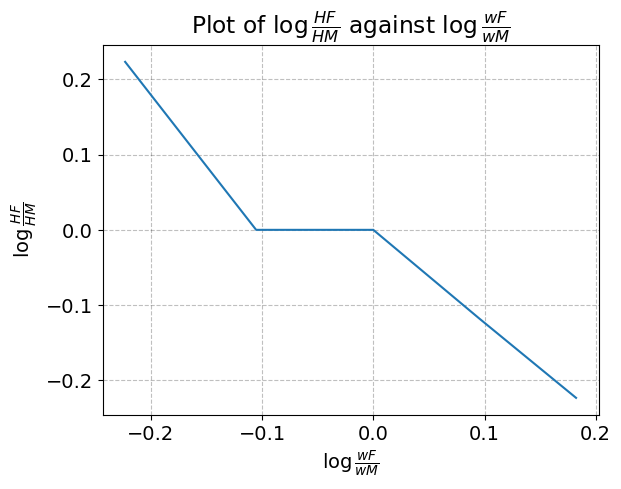

In [5]:
model2 = HouseholdSpecializationModelClass()
log_wF_wM = []
log_HF_HM = []
wFs = [0.8, 0.9, 1.0, 1.1, 1.2]

for wF in wFs:
    model2.par.wF = wF
    opt = model2.solve_discrete()
    log_wF_wM.append(np.log(model2.par.wF/model2.par.wM))
    log_HF_HM.append(np.log(opt.HF/opt.HM))
log_wF_wM, log_HF_HM


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM, log_HF_HM)

ax.set_title(r'Plot of $\log\frac{HF}{HM}$ against $\log\frac{wF}{wM}$')
ax.set_ylabel(r'$\log\frac{HF}{HM}$')
ax.set_xlabel(r'$\log\frac{wF}{wM}$');

The figure above shows how the hours worked at home for men and women changes when the wages for hours worked in the market for men and women changes. When the wages increases the hours worked at home are decreasing. Between -0.1 and 0 there is no change in the hours worked at home, but once the wages exceeds 0 the hours worked at home decreases again. 

# Question 3

Explain your code and procedure

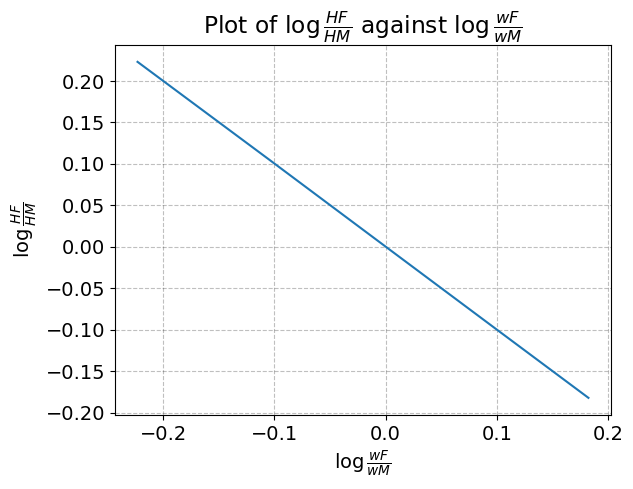

In [6]:

model3 = HouseholdSpecializationModelClass()

model3.solve_wF_vec()

# a. create the figure
fig = plt.figure()
log_wF_wM = np.log(model3.par.wF_vec)
log_HF_HM = np.log(model3.sol.HF_vec / model3.sol.HM_vec)
# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM, log_HF_HM)

ax.set_title(r'Plot of $\log\frac{HF}{HM}$ against $\log\frac{wF}{wM}$')
ax.set_ylabel(r'$\log\frac{HF}{HM}$')
ax.set_xlabel(r'$\log\frac{wF}{wM}$');

The figure above shows how the hours worked at home for men and women changes when the wages for hours worked in the market for men and women changes but now in continuous time. It is clear that the Log(HF_HM) and Log(wF_wM) moves the same as in question 2, but the hours worked from are now stable and 0 between -0.1 and 0.1 so the wages has to increase more for the hours worked at home to decrease when they reach 0.

# Question 4

In tis next section, the difference between $(\hat{\beta}_0-\beta_0)^2+(\hat{\beta}_1-\beta_1)^2$ is found

In [ ]:
model4 = HouseholdSpecializationModelClass()

# The vector for female wages is defined and printed
wFs = [0.8, 0.9, 1.0, 1.1, 1.2]
print(f"The wages for females are {wFs}")
alpha_list = np.linspace(0.1,0.99,20)
sigma_list =np.linspace(0.1,1,20)
temp_beta_sol = 1000000



# An loop is created over the wages to find the optimal labor supply
for alpha in alpha_list:    
    for sigma in sigma_list:
        for i, wage in enumerate(wFs): #Creates HF_vec and HM_vec for run_regression() function
            model4.par.wF = wage
            model4.par.alpha = alpha
            model4.par.sigma = sigma
            opt = model4.solve_discrete()
            model4.sol.HF_vec[i] = opt.HF
            model4.sol.HM_vec[i] = opt.HM
            ratio = opt.HF/opt.HM
            
        
        # Runs the regression for different values of sigma and alpha that minimizes the difference between the target beta 0 and 1
        # and the estimated.
        model4.run_regression()
        if abs((model4.par.beta0_target-model4.sol.beta0)**2+(model4.par.beta1_target-model4.sol.beta1)**2 < temp_beta_sol):
            temp_beta_sol = abs(model4.par.beta0_target-model4.sol.beta0)**2+(model4.par.beta1_target-model4.sol.beta1)**2
            temp_alpha_opt = alpha
            temp_sigma_opt = sigma
            beta0 = model4.sol.beta0
            beta1 = model4.sol.beta1
            #prints the sigma and alpha values which minimizes the difference between the target beta 0,  1 and the estimated.
            print(f"sigma= {temp_sigma_opt:.2f}, alpha= {temp_alpha_opt:.2f}, beta0={beta0:.2f}, beta1={beta1:.2f} temp_beta_sol= {temp_beta_sol:.2f}")


$\alpha = 0.80$ and $\sigma = 0.24$, minimizes the difference between the targeted $\hat{\beta}_0-\beta_0$ and $\hat{\beta}_1-\beta_1$. \
The value of $\beta_0 = 0.37$ and $\beta_1 = -0.20$ \
**Interpretation**
The positive $\beta_0$ value indicate that, even if the relative wage between men and women would be the same, women would still do more house work, relative to men. \
The negative $\beta_1$ value indicates that an increse in womens wages would lead to a decrese for the home hours for women, since it measures the relation between the relative wages of men and women and how if affects the relation between the home hours between men and women. This is consistient with the theory of comparative advantage, such that when a woman specializes in the work market, the man will specialize in house work. \
Below the effect of errors as a function of $\sigma$ between $0.1$ and $0.3$ and $\alpha$ between $0.7$ and $1.0$ is illustrated. 


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
model4 = HouseholdSpecializationModelClass()

alpha_list = np.linspace(0.7, .99, 10)  # narrows the value of alpha to show the effect in the range of the optimal value
sigma_list = np.linspace(0.1, 0.3, 10)  # narrows the value of sigma to show the effect in the range of the optimal value

errors = np.zeros((len(alpha_list), len(sigma_list)))  # initialize array to hold errors

for i, alpha in enumerate(alpha_list):
    for j, sigma in enumerate(sigma_list):
        model4.par.alpha = alpha
        model4.par.sigma = sigma
        model4.solve_wF_vec(discrete=False)
        model4.run_regression()
        errors[i,j] = (model4.par.beta0_target - model4.sol.beta0)**2 + (model4.par.beta1_target - model4.sol.beta1)**2

# A 3D plot is created to show the squared errors as a function of alpha and sigma
alpha_mesh, sigma_mesh = np.meshgrid(alpha_list, sigma_list, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, sigma_mesh, errors, cmap='viridis')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel('squared error')
ax.set_title("Figure 5: Heatmap of errors as a function of alpha and sigma")

plt.show()

As the figure shows, the squared error is the smallest when $\alpha = 0.80$ and $\sigma = 0.24$

 

# Question 5

An extension to the model, coulde be to take childcare into consideration. The new utility function can then be expressed as:

$\max_{L_H, H_M, L_F, H_F}\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)+\delta N^{\gamma}, \rho>0, \nu>0, \epsilon>0$

Where, N is the number of children, $\gamma\in(0;1)$, is the share parameter for child care in the utility function and $\delta>0$ is the weight parameter for child care in the utility function.

To solve this, a new class is created, to analyse the different results in a model without childcare, as in question 1-4, and a model with.

/Users/frederikkelund/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:238: RuntimeWarning: invalid value encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alpha


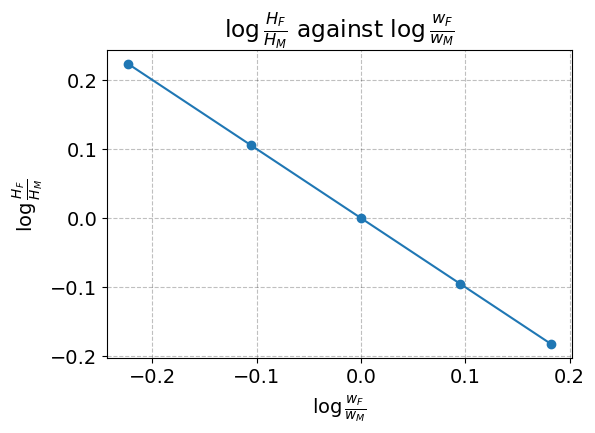

In [7]:
#The model is imported:
model5 = NewModelQ5()

alpha = 0.5
sigma = 1
wF_l = [0.8, 0.9, 1.0, 1.1, 1.2]
gamma = 1
delta = 1.0
N = 1 #The number of children is set to 1


# Creating a figure
fig, ax = plt.subplots(figsize=(6, 4))

results_l = [] #Create an empty list, for the results
for wF in wF_l:
    # Modifies the values of alpha, sigma, and wF in the model
    model5.par.alpha = alpha
    model5.par.sigma = sigma
    model5.par.wF = wF
    
    # The model is solved
    results = model5.solve()
    ratio = np.log(results.HF / results.HM)
    
    results_l.append((alpha, sigma, wF, ratio))

# The results are plotted into the figure
wF_q5, ratio_q5 = zip(*[r[2:] for r in results_l])
ax.plot(np.log(np.array(wF_q5)/model5.par.wM), ratio_q5, marker='o', label=f'$\\sigma={sigma}$')

# The figure is setup
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Adjust the layout and spacing of the figure
plt.show()

When compared to the plot in Q3, these to plots do not differ. 

To analyse the change if the $\alpha$ and $\sigma$ values change, when $\alpha$, isn't fixed at $\alpha=0.5$, a table simular to the one in Q1, is created. 

In [ ]:

# First a list for both alpha and sigma values are created
alpha_l = [0.25, 0.5, 0.75]
sigma_l = [0.5,1.0,1.5]

# Second a tabel is constructed for the valkues
df = pd.DataFrame(columns = pd.Index(alpha_l, name="sigma/alpha"), index = pd.Index(sigma_l, name=""))

# Third the model is sobled for the diffent parameter values
for i in alpha_l:
    for j in sigma_l:
        model5.par.alpha = i
        model5.par.sigma = j
        results = model5.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Lastly the tabel is printed
print(df)

When comparing to the results in Q1, we can observe, that the model is unchanged for when the contribution is equal. However, when there is an unequal contribution from different genders, the outcomes diverge. Specifically, when women contribute a greater share, $\alpha>0.5$, and the elasticity of substitution is high, $\sigma>1$, they tend to allocate more time to household tasks when they have children, in contrast to the model without children.